In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

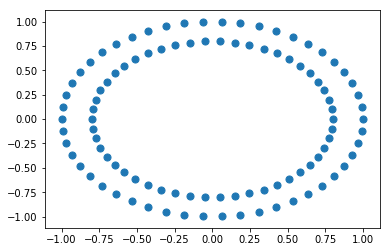

In [3]:
from sklearn.datasets.samples_generator import make_circles
X, y_true = make_circles()
plt.scatter(X[:, 0], X[:, 1], s=50)

In [75]:
## function to assign each data point to a cluster based 
def assign_cluster(X, c):
    clusters  = {}
    for x in X:
        key = min([(i[0], np.linalg.norm(x-c[i[0]])) \
                    for i in enumerate(c)], key=lambda t:t[1])[0]
        try:
            clusters[key].append(x)
        except KeyError:
            clusters[key] = [x]
    return clusters

## function to re-evaluate centers on the basis of clusters
def reevaluate_centers(clusters):
    new_c = []
    keys = sorted(clusters.keys())
    for k in keys:
        new_c.append(np.mean(clusters[k], axis = 0))
    return new_c

## function to check whether centers have stabilised
def has_converged(new_c, c):
    return (set([tuple(a) for a in new_c]) == set([tuple(a) for a in c]))

## lloyds algorithm
def lloyds(X, K):
    # initialize to K random centers
    i = random.sample(range(0, len(X) + 1), K)
    c = [X[element] for element in i]
    new_c = [X[element + 1] for element in i]
    while not has_converged(new_c, c):
        c = new_c
        clusters = assign_cluster(X, c)
        new_c = reevaluate_centers(clusters)
    return(new_c, clusters)

In [5]:
k_means = lloyds(X, 2)

In [63]:
## create an array assigning clusters to each data point
s = np.zeros(100)
for key, value in k_means[1].items():
    for i in range(0, len(X)):
        if any((X[i] == item).all() for item in value):
            s[i] = key

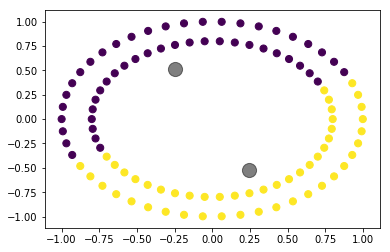

In [71]:
plt.scatter(X[:, 0], X[:, 1], c = s, s=50, cmap='viridis')
centers = np.asarray(k_means[0])
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

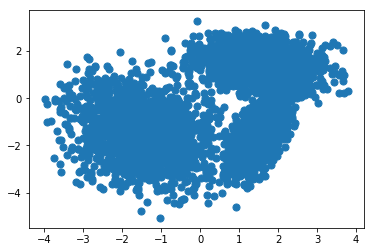

In [86]:
## Example dataset 1
from sklearn.datasets.samples_generator import make_classification
Y, y_true = make_classification(n_samples = 5000, n_classes = 3, n_features = 10, n_clusters_per_class = 1, class_sep = 1.5, shuffle = False, 
                                random_state = 301)
plt.scatter(Y[:, 0], Y[:, 1], s=50)

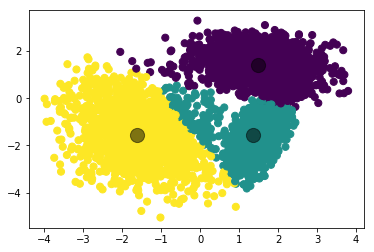

In [88]:
## Undesirable clustering of example dataset 1
k_means = lloyds(Y, 3)
s = np.zeros(5000)
for key, value in k_means[1].items():
    for i in range(0, len(Y)):
        if any((Y[i] == item).all() for item in value):
            s[i] = key
plt.scatter(Y[:, 0], Y[:, 1], c = s, s=50, cmap='viridis')
centers = np.asarray(k_means[0])
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

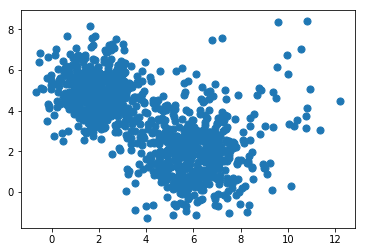

In [97]:
## Example dataset 2
from sklearn.datasets.samples_generator import make_blobs
blob_1, y1 = make_blobs(n_samples=25, centers=[(10,5)], cluster_std=1.5, random_state=2)
blob_2, y2 = make_blobs(n_samples=500, centers=[(6,2)], cluster_std=1.3, random_state=2)
blob_3, y3 = make_blobs(n_samples=500, centers=[(2,5)], cluster_std=1, random_state=2)
Z = np.vstack([blob_1, blob_2, blob_3])
plt.scatter(Z[:, 0], Z[:, 1], s=50)

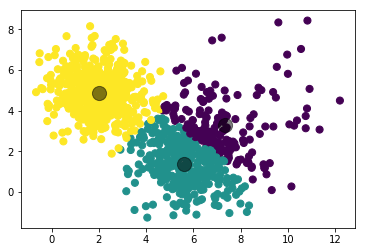

In [98]:
## Undesirable clustering of example dataset 1
k_means = lloyds(Z, 3)
s = np.zeros(1025)
for key, value in k_means[1].items():
    for i in range(0, len(Z)):
        if any((Z[i] == item).all() for item in value):
            s[i] = key
plt.scatter(Z[:, 0], Z[:, 1], c = s, s=50, cmap='viridis')
centers = np.asarray(k_means[0])
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [95]:
len(Z)

1025